All Imports

In [32]:
import random
import time
import requests
import subprocess
from faker import Faker
import psutil
import matplotlib.pyplot as plt

Setting up the application for tests

In [33]:
BASE_URL = "http://localhost:4567"
json_headers = {"Accept": "application/json"}
faker = Faker()
output_dir = "test_metrics/"
session = requests.Session()

In [34]:
def start_server():
    try:
        response = requests.get(BASE_URL)
        if response.status_code == 200:
            print("Server is already running.")
            return None
    except requests.exceptions.ConnectionError:
        print("Starting the server...")
        process = subprocess.Popen(['java', '-jar', 'resources/runTodoManagerRestAPI-1.5.5.jar'])
        time.sleep(5)
        return process
def stop_server(process):
    if process:
        process.terminate()
        print("Server terminated.")

Generate random project, todo and category

In [35]:
def generate_project_data():
    """
    Generate random project data based on the given fields and examples.
    """
    return {
        "title": faker.sentence(nb_words=3),
        "completed": random.choice([True, False]),
        "active": random.choice([True, False]),
        "description": faker.text(max_nb_chars=100)
    }


def generate_todo_data():
    return {
        "title": faker.sentence(nb_words=3),
        "description": faker.text(max_nb_chars=100),
        "doneStatus" : random.choice([True, False]),
    }


def generate_category_data():
    return {
        "title": faker.sentence(nb_words=3),
        "description": faker.text(max_nb_chars=100)
    }

Generate multiple random objects

In [36]:
def create_random_projects(num_projects):
    """
    Create a specified number of random projects.
    """
    project_ids = []
    for i in range(num_projects):
        project_id, elapsed_time = create_random_project()
        if project_id != 0:
            project_ids.append(project_id)
        else:
            print(f"Failed to create project {i + 1}/{num_projects}")
    return project_ids

def create_random_project():
    """
    Create a single random project.
    """
    project_id = 0 
    project_data = generate_project_data()  # Assumes this function is defined elsewhere
    start_time = time.time()
    response = session.post(
        f"{BASE_URL}/projects",
        json=project_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code == 201:
        project_id = response.json().get("id", 0)  # Fallback to 0 if "id" is missing
    else:
        print(f"Failed to create project: {response.status_code} - {response.text}")
    return project_id, elapsed_time

def create_random_todos(num_todos):
    todos_ids = []
    for i in range(num_todos):
        todo_id, elapsed_time = create_random_todo()
        if todo_id != 0:
            todos_ids.append(todos_ids)
        else:
            print(f"Failed to create todo {i + 1}/{num_todos}")
    return todos_ids

def create_random_todo():
    todo_id = 0 
    todo_data = generate_todo_data()
    start_time = time.time()
    response = session.post(
        f"{BASE_URL}/todos",
        json=todo_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code == 201:
        todo_id = response.json().get("id", 0)
    else:
        print(f"Failed to create todo: {response.status_code} - {response.text}")
    return todo_id, elapsed_time
 
def create_random_categories(category_num):
    categories_ids = []
    for i in range(category_num):
        category_id, elapsed_time = create_category()
        if category_id != 0:
            categories_ids.append(category_id)
        else:
            print(f"Failed to create category {i + 1}/{category_num}")
    return categories_ids

def create_category():
    category_id = 0 
    category_data = generate_category_data() 
    start_time = time.time()
    response = session.post(
        f"{BASE_URL}/categories",
        json=category_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code == 201:
        category_id = response.json().get("id", 0)  # Fallback to 0 if "id" is missing
    else:
        print(f"Failed to create category: {response.status_code} - {response.text}")
    return category_id, elapsed_time

Get all objects of a specific operation and measure the time taken

In [37]:
def get_all_projects():
    """
    Fetch all projects and measure the time taken.
    """
    start_time = time.time()
    response = session.get(f"{BASE_URL}/projects", headers=json_headers)
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(f"Failed to fetch projects: {response.status_code} - {response.text}")
    projects = response.json().get('projects', [])
    project_ids = [project.get('id') for project in projects]
    return projects, project_ids, elapsed_time


def get_all_todos():
    start_time = time.time()
    response = session.get(f"{BASE_URL}/todos", headers=json_headers)
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(f"Failed to fetch todos: {response.status_code} - {response.text}")
    todos = response.json().get('todos', [])
    todo_ids = [todo.get('id') for todo in todos]
    return todos, todo_ids, elapsed_time


def get_all_categories():
    start_time = time.time()
    response = session.get(f"{BASE_URL}/categories", headers=json_headers)
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(f"Failed to fetch categories: {response.status_code} - {response.text}")
    categories = response.json().get('categories', [])
    category_ids = [category.get('id') for category in categories]
    return categories, category_ids, elapsed_time
    


def get_object_count():
    _, project_ids, _ = get_all_projects()
    _, category_ids, _ = get_all_categories()
    _, todo_ids, _ = get_all_todos()
    return len(project_ids) + len(category_ids) + len(todo_ids)

Functions for deleting projects


In [7]:
def delete_project(project_id):
    """
    Delete a project ID and measure the time
    """
    start_time = time.time()
    response = session.delete(
        f"{BASE_URL}/projects/{project_id}",
        headers=json_headers
    )

    elapsed_time = time.time() - start_time

    if response.status_code != 200:
        print(f"Failed to delete project{len(project_id)}: {response.status_code} - {response.text}")
    return elapsed_time
            
def delete_projecs(project_ids):
    """
    Delete a projects IDs
    """
    for i in project_ids:
        delete_project(i)
        
def delete_all_projects():
    _, project_ids, _ = get_all_projects()
    delete_projecs(project_ids)

Functions for deleting todos

In [8]:
def delete_todo(todo_id):
    start_time = time.time()
    response = session.delete(
        f"{BASE_URL}/todos/{todo_id}",
        headers=json_headers
    )

    elapsed_time = time.time() - start_time

    if response.status_code != 200:
        print(f"Failed to delete todo{len(todo_id)}: {response.status_code} - {response.text}")
    return elapsed_time

def delete_todos(todo_ids):
    for i in todo_ids:
        delete_todo(i)

def delete_all_todos():
    _, todo_ids, _ = get_all_todos()
    delete_todos(todo_ids)

Functions for deleting categories

In [38]:
def delete_category(category_id):
    """
    Delete a category ID and measure the time
    """
    start_time = time.time()
    response = session.delete(
        f"{BASE_URL}/categories/{category_id}",
        headers=json_headers
    )

    elapsed_time = time.time() - start_time

    if response.status_code != 200:
        print(f"Failed to delete category{len(category_id)}: {response.status_code} - {response.text}")
    return elapsed_time
            
def delete_categories(categories_ids):
    for i in categories_ids:
        delete_category(i)
        
def delete_all_categories():
    _, categories_ids, _ = get_all_categories()
    delete_categories(categories_ids)

Function for deleting all objects

In [39]:
def delete_all_objects():
    delete_all_categories()
    delete_all_projects()
    delete_all_todos()

Functions to modify project, todo and category

In [11]:
def modify_project(project_id):
    """
    Update a specific project by ID and measure the time taken.
    """
    project_data = generate_project_data() 
    start_time = time.time()
    response = session.put(
        f"{BASE_URL}/projects/{project_id}",
        json=project_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(
            f"Failed to update project ID {project_id}: Time = {elapsed_time:.5f}s, "
            f"Status = {response.status_code}, Error = {response.text}"
        )
    return elapsed_time

In [12]:
def modify_todo(todo_id):
    todo_data = generate_todo_data()
    start_time = time.time()
    response = session.put(
        f"{BASE_URL}/todos/{todo_id}",
        json=todo_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(
            f"Failed to update todo ID {todo_id}: Time = {elapsed_time:.5f}s, "
            f"Status = {response.status_code}, Error = {response.text}"
        )
    return elapsed_time


In [40]:
def modify_category(category_id):
    """
    Update a specific category by ID and measure the time taken.
    """
    category_data = generate_category_data() 
    start_time = time.time()
    response = session.put(
        f"{BASE_URL}/categories/{category_id}",
        json=category_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(
            f"Failed to update category ID {category_id}: Time = {elapsed_time:.5f}s, "
            f"Status = {response.status_code}, Error = {response.text}"
        )
    return elapsed_time

Starting the server

In [41]:
process = start_server()

Server is already running.


Function to store and plot data

In [42]:
def track_system_metrics():
    """Tracks CPU and memory usage."""
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory = psutil.virtual_memory()
    return cpu_usage, memory.available / (1024 ** 2)

def plot_metric(metric, action, label = "Time taken (seconds)"):
    times = [t[0] for t in metric]
    objects = [t[1] for t in metric]
    
    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.plot(objects, times, marker='o', linestyle='-', label='Elapsed Time')
    
    # Adding labels and title
    plt.title(f"Number of objects vs time taken to {action}", fontsize=14)
    plt.xlabel("Number of objects", fontsize=12)
    plt.ylabel(label, fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()


Getting data from todo

In [15]:
delete_all_objects()
step = 1000
steps_num  = 100000//step

create_todo_metric = []
delete_todo_metric = []
modify_todo_metric = []
cpu_todo_metric = []
memory_todo_metric = []


for i in range(steps_num + 1):
    
    _, _, time_get_todos = get_all_todos()
    todo_id, time_create_todo = create_random_todo()
    time_modify_todo = modify_todo(todo_id)
    time_delete_todo = delete_todo(todo_id)
    cpu = psutil.cpu_percent(interval=1)
    memory = psutil.virtual_memory().available / (1024 ** 2)  # Convert to MB
    
    create_todo_metric.append((time_create_todo, step * i))
    delete_todo_metric.append((time_delete_todo, step * i))
    modify_todo_metric.append((time_modify_todo, step * i))
    cpu_todo_metric.append((cpu, step * i))
    memory_todo_metric.append((memory, step * i))
    
    
    create_random_todos(step - 1)

Getting data from projects

In [16]:
delete_all_objects()
step = 1000
steps_num  = 100000//step

create_project_metric = []
delete_project_metric = []
modify_project_metric = []
cpu_project_metric = []
memory_project_metric = []


for i in range(steps_num + 1):
    
    _, _, time_get_projects = get_all_projects()
    project_id, time_create_project = create_random_project()
    time_modify_project = modify_project(project_id)
    time_delete_project = delete_project(project_id)
    cpu = psutil.cpu_percent(interval=1)
    memory = psutil.virtual_memory().available / (1024 ** 2)  # Convert to MB
    
    create_project_metric.append((time_create_project, step * i))
    delete_project_metric.append((time_delete_project, step * i))
    modify_project_metric.append((time_modify_project, step * i))
    cpu_project_metric.append((cpu, step * i))
    memory_project_metric.append((memory, step * i))
    
    
    create_random_projects(step - 1)

Getting data from category

In [ ]:


# Initialize metrics for categories
delete_all_objects()
step = 1000
steps_num = 100000 // step

create_category_metric=[]
delete_category_metric=[]
modify_category_metric=[]
create_category_system_metrics = []
delete_category_system_metrics = []
modify_category_system_metrics = []

for i in range(steps_num + 1):
    # Track system metrics before creating a category
    cpu_start, memory_start = track_system_metrics()
    category_id, time_create_category = create_category()
    cpu_end, memory_end = track_system_metrics()
    create_category_system_metrics.append({
        "step": step * i,
        "cpu_start": cpu_start,
        "cpu_end": cpu_end,
        "memory_start_MB": memory_start,
        "memory_end_MB": memory_end,
    })

    # Track system metrics before modifying a category
    cpu_start, memory_start = track_system_metrics()
    time_modify_category = modify_category(category_id)
    cpu_end, memory_end = track_system_metrics()
    modify_category_system_metrics.append({
        "step": step * i,
        "cpu_start": cpu_start,
        "cpu_end": cpu_end,
        "memory_start_MB": memory_start,
        "memory_end_MB": memory_end,
    })

    # Track system metrics before deleting a category
    cpu_start, memory_start = track_system_metrics()
    time_delete_category = delete_category(category_id)
    cpu_end, memory_end = track_system_metrics()
    delete_category_system_metrics.append({
        "step": step * i,
        "cpu_start": cpu_start,
        "cpu_end": cpu_end,
        "memory_start_MB": memory_start,
        "memory_end_MB": memory_end,
    })

    # Append operation metrics
    create_category_metric.append((time_create_category, step * i))
    modify_category_metric.append((time_modify_category, step * i))
    delete_category_metric.append((time_delete_category, step * i))

    # Simulate creating additional objects
    create_random_projects(step - 1)

Plotting todo data

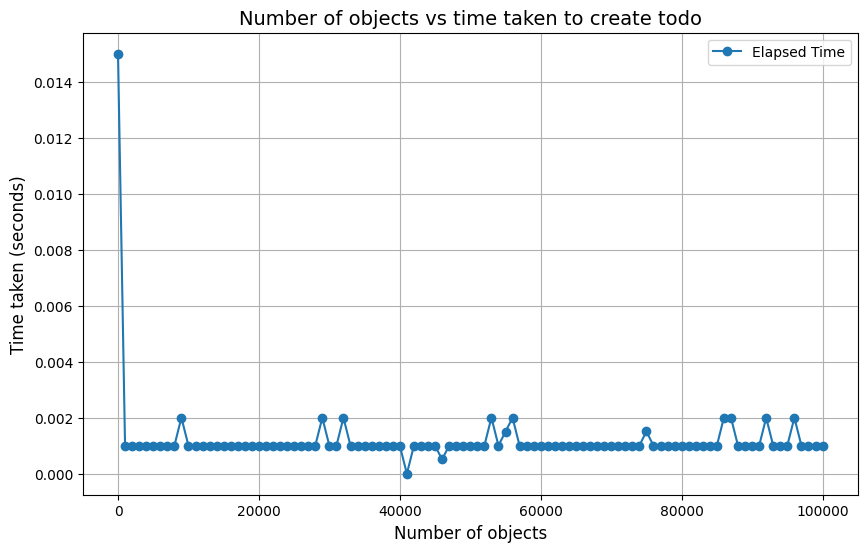

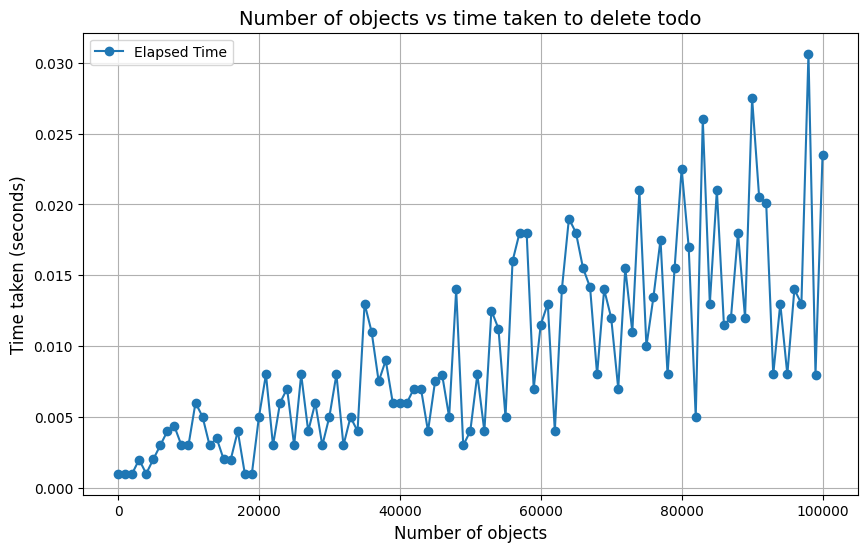

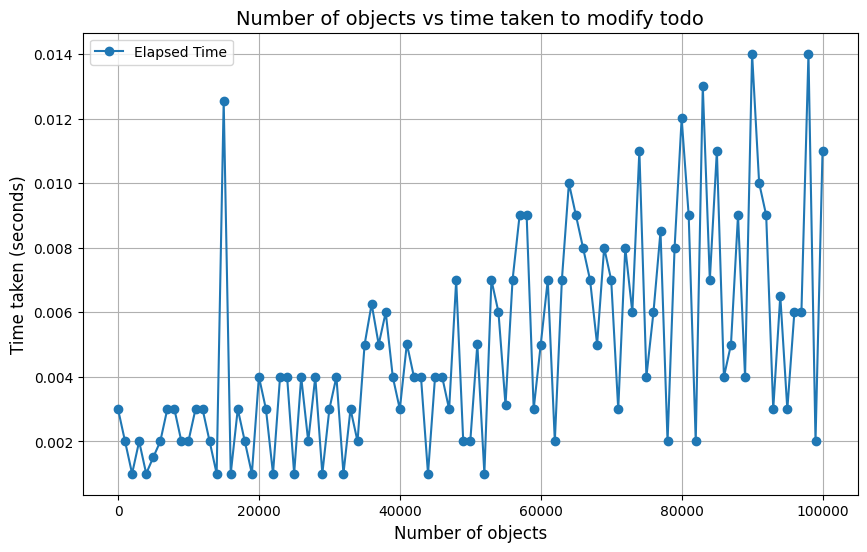

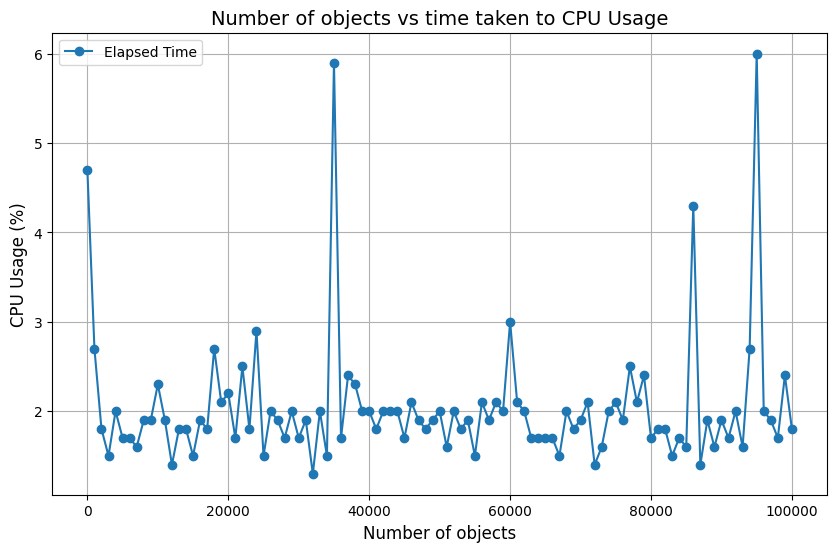

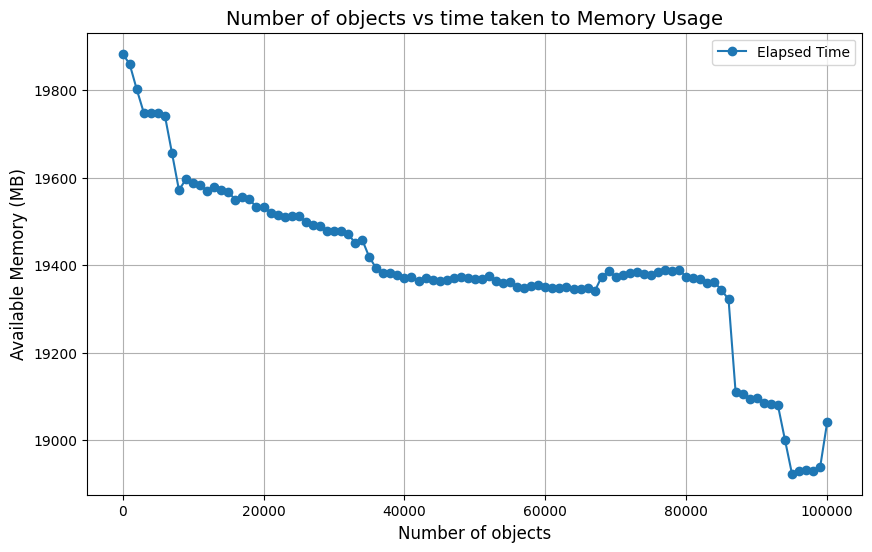

In [19]:
plot_metric(create_todo_metric, "create todo")
plot_metric(delete_todo_metric, "delete todo")
plot_metric(modify_todo_metric, "modify todo")
plot_metric(cpu_todo_metric, "CPU Usage", "CPU Usage (%)", )
plot_metric(memory_todo_metric, "Memory Usage", "Available Memory (MB)")

Plotting project data

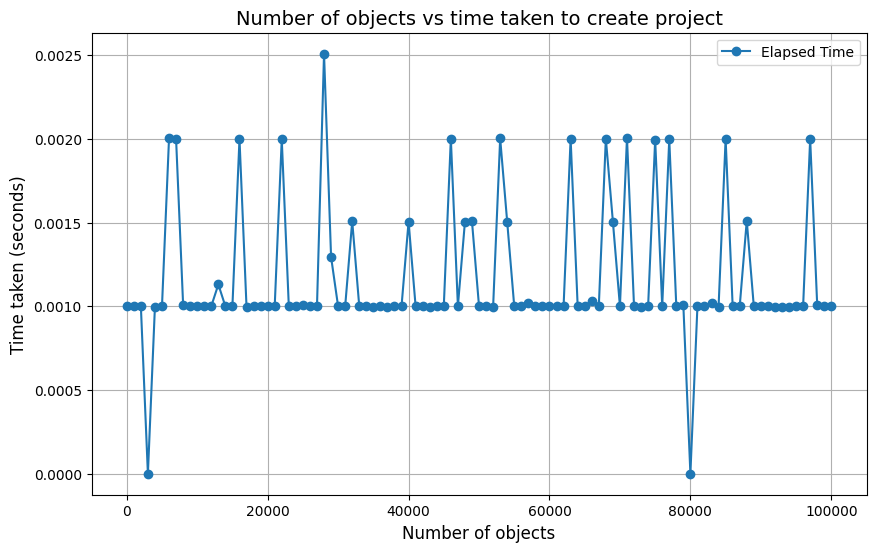

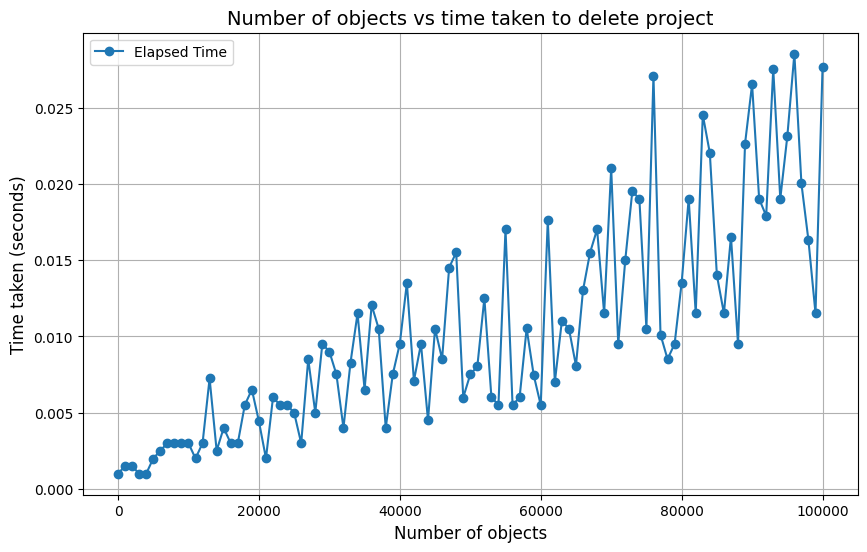

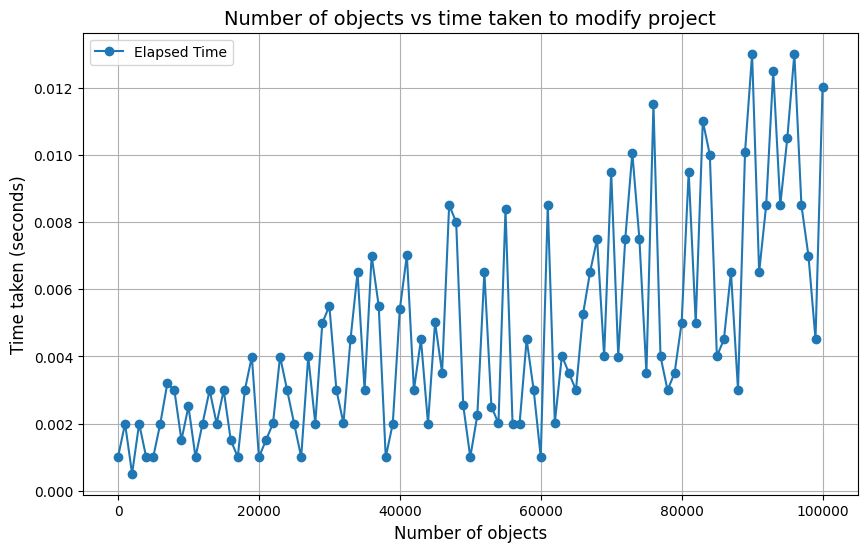

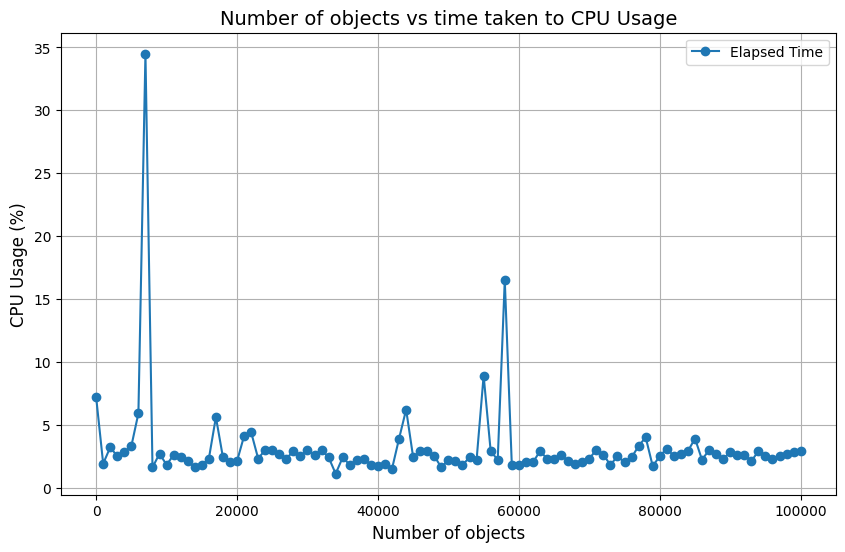

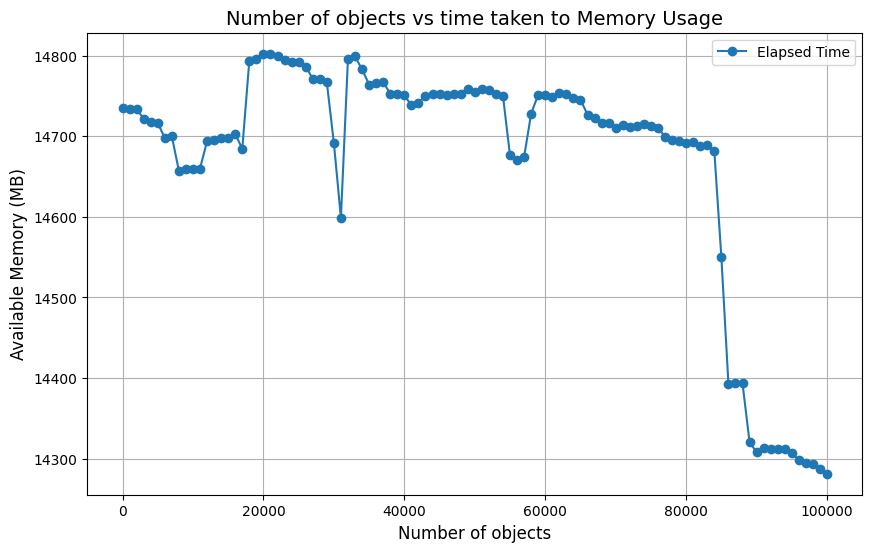

In [ ]:
plot_metric(create_project_metric, "create project")
plot_metric(delete_project_metric, "delete project")
plot_metric(modify_project_metric, "modify project")
plot_metric(cpu_project_metric, "CPU Usage", "CPU Usage (%)", )
plot_metric(memory_project_metric, "Memory Usage", "Available Memory (MB)")

Plotting category data

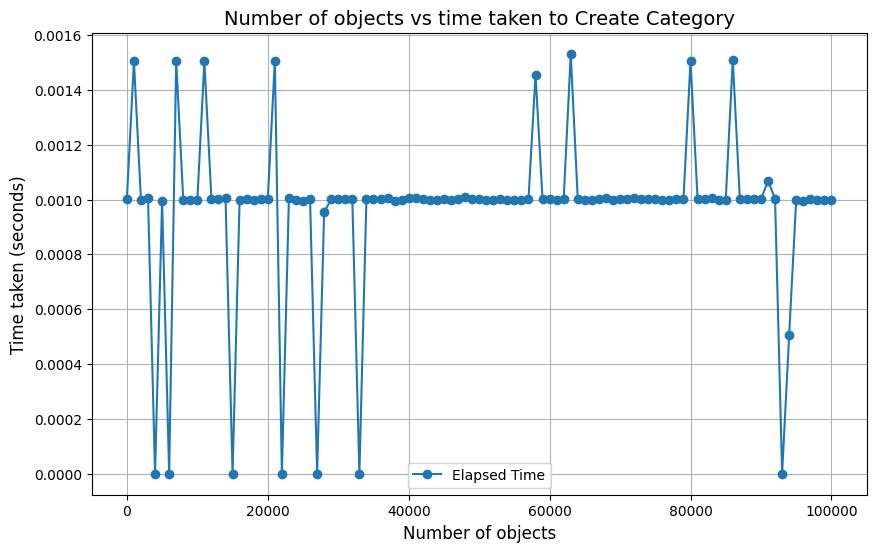

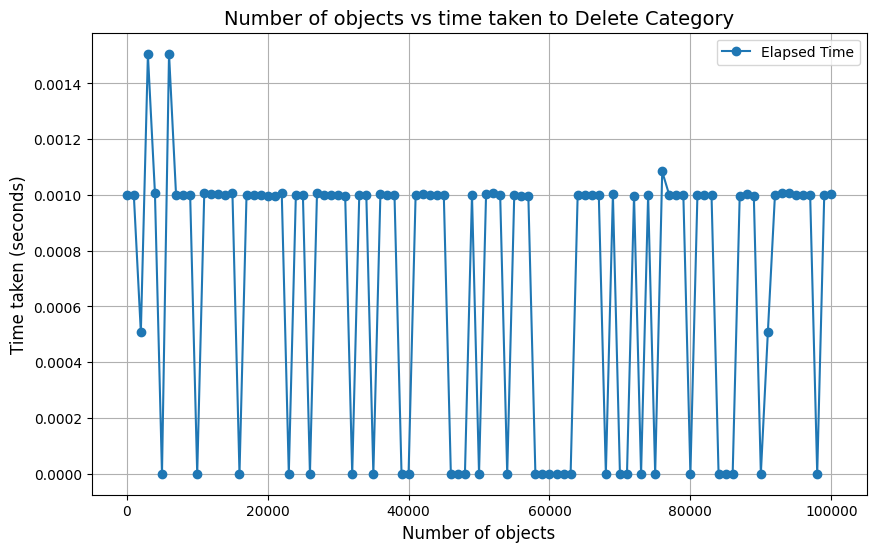

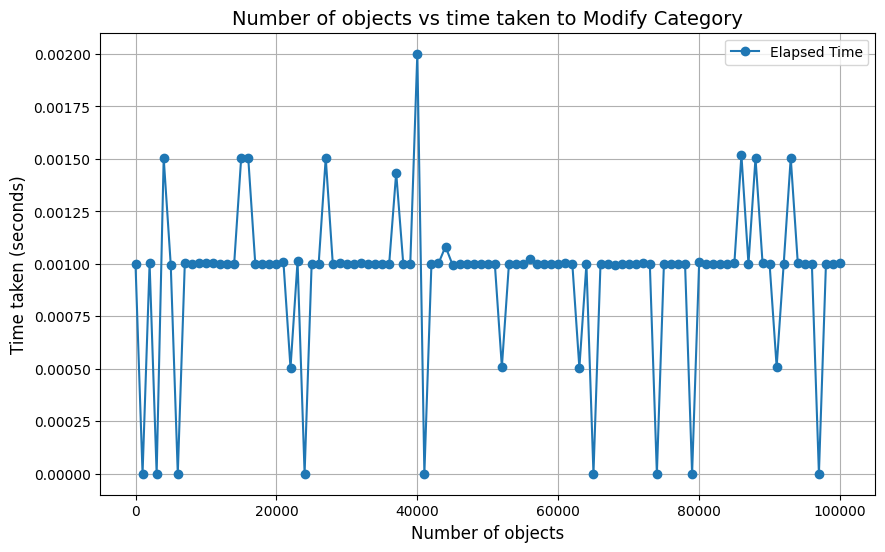

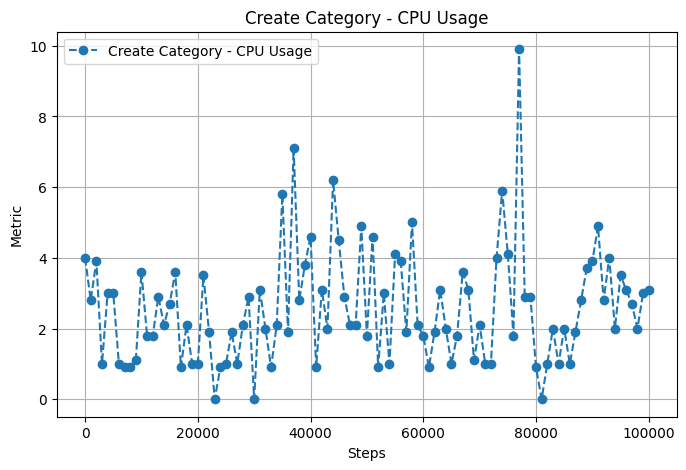

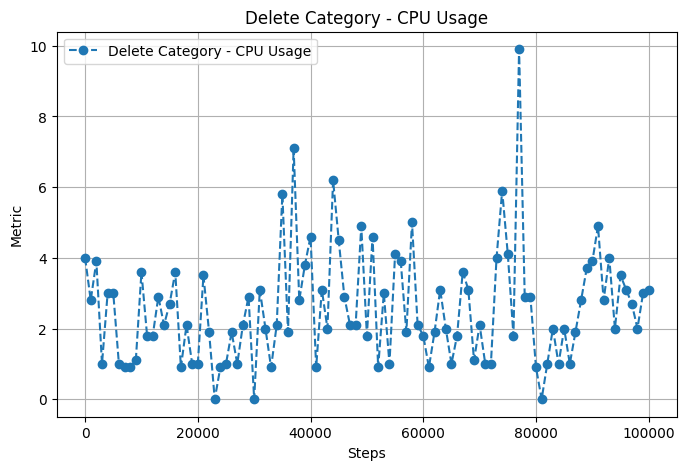

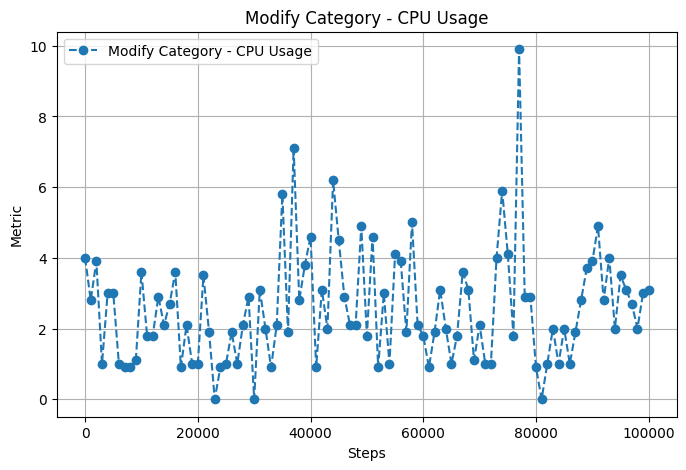

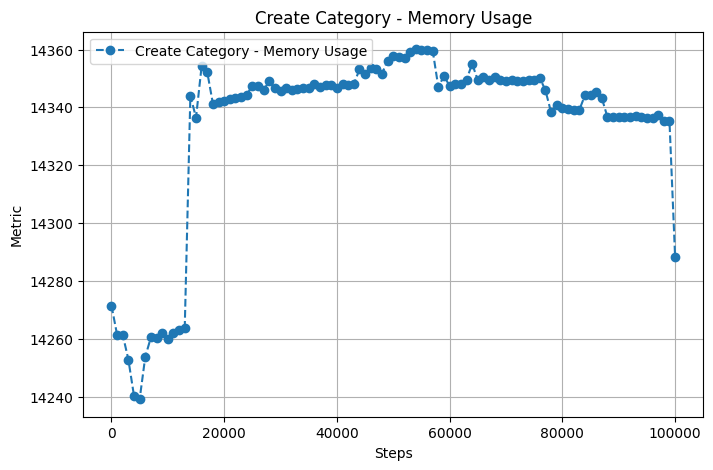

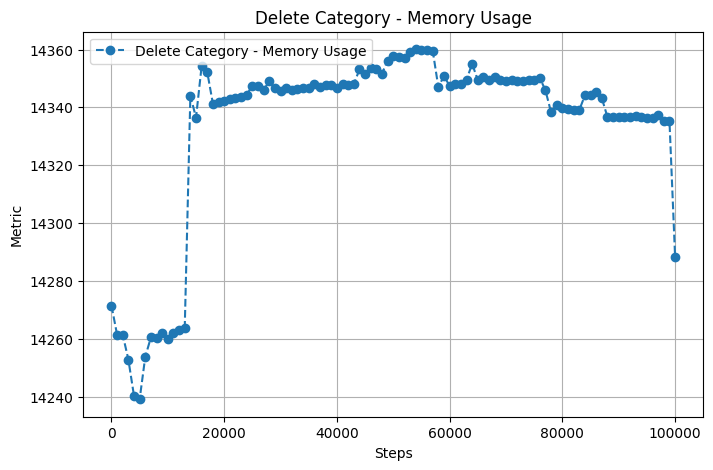

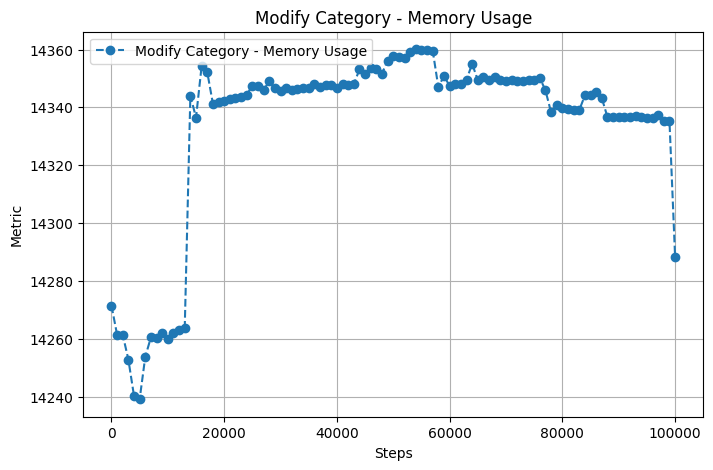

In [ ]:

# Extract metrics for plotting
def extract_system_metric(system_metrics, key):
    return [(metric[key], metric["step"]) for metric in system_metrics]

# Plot operation metrics
plot_metric(create_category_metric, "Create Category")
plot_metric(modify_category_metric, "Modify Category")
plot_metric(delete_category_metric, "Delete Category")

# Plot system metrics by action
plot_metric(extract_system_metric(create_category_system_metrics, "cpu_end"), 
            "CPU Usage during Create Category", "CPU Usage (%)")
plot_metric(extract_system_metric(modify_category_system_metrics, "cpu_end"), 
            "CPU Usage during Modify Category", "CPU Usage (%)")
plot_metric(extract_system_metric(delete_category_system_metrics, "cpu_end"), 
            "CPU Usage during Delete Category", "CPU Usage (%)")

plot_metric(extract_system_metric(create_category_system_metrics, "memory_end_MB"), 
            "Memory Usage during Create Category", "Memory Usage (MB)")
plot_metric(extract_system_metric(modify_category_system_metrics, "memory_end_MB"), 
            "Memory Usage during Modify Category", "Memory Usage (MB)")
plot_metric(extract_system_metric(delete_category_system_metrics, "memory_end_MB"), 
            "Memory Usage during Delete Category", "Memory Usage (MB)")

In [ ]:
stop_server(process)